In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

In [8]:
data=pd.read_csv("Real estate.csv")
data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [10]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


In [11]:
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

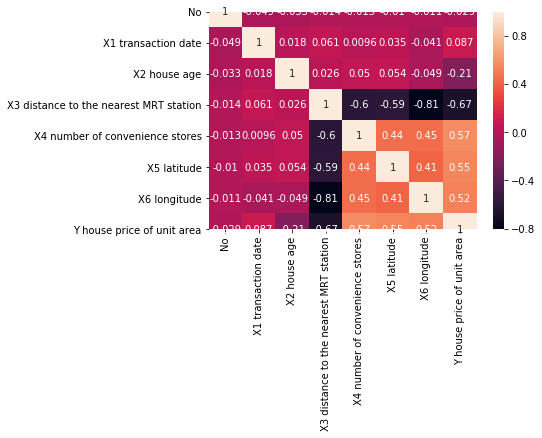

In [13]:
sns.heatmap(data.corr(),annot=True)

# Splitting X and Y

In [29]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [30]:
x

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


# Splitting Dataset into Training and Testing arrays


In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.05,random_state = 0)

# Training Mode

In [46]:
from sklearn.linear_model import LinearRegression
Reg=LinearRegression()
Reg.fit(x_train,y_train)
LinearRegression()
Reg.coef_

array([-3.28281240e-03,  5.18980590e+00, -2.70389960e-01, -4.34076666e-03,
        1.16918512e+00,  2.26156387e+02, -5.63794054e+00])

In [48]:
y_pred=Reg.predict(x_test)
y_pred

array([39.09184855, 12.82614768, 41.76173828, 12.09424855, 41.68156196,
       39.36666405, 40.57898977, 33.8846898 , 50.05358688, 45.550874  ,
       45.51385485, 40.95300388, 38.33135922, 39.89670897, 46.59039145,
       38.21070994, 39.78636257, 40.74697578, 41.30341084, 42.31380145,
       49.36104125])

In [49]:
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_test,y_pred))

R2 score: 0.7065810721724328


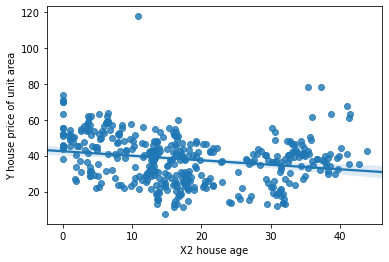

In [50]:
sns.regplot("X2 house age","Y house price of unit area",data=data)
